# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt


np.random.seed(42)

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [178]:
df = pd.read_csv('/content/Datasets/RTA_Dataset.csv')
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [147]:
df.replace('na', np.nan, inplace=True)

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


I will delete the symbols

In [146]:
df['Type_of_vehicle'] = df['Type_of_vehicle'].str.replace(r'\s*\(.*?\)', '', regex=True).str.strip()

In [148]:
df.head(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,05:02 PM,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,05:02 PM,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public,Owner,5-10yr,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,05:02 PM,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry,Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06 AM,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public,Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06 AM,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yr,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [145]:
df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].replace({
    ' (yr)':'(yrs)',
})

In [93]:
df.sample()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
4281,02:27 PM,Friday,Over 51,Male,Junior high school,Employee,Above 10yr,NaN,Owner,2-5yr,...,U-Turn,NaN,NaN,NaN,NaN,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury


In [144]:
df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].replace(
    {'yrs': 'yr', 'years': 'yr', 'yr': 'yr'}, regex=True)

In [6]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [90]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [149]:
df["Educational_level"].fillna("Educational_level" , inplace =True)
df["Fitness_of_casuality"].fillna("Fitness_of_casuality" , inplace =True)

In [80]:
df["Vehicle_driver_relation"].mode()
df["Driving_experience"].mode()
df["Type_of_vehicle"].mode()
df["Owner_of_vehicle"].mode()
df["Service_year_of_vehicle"].mode()
df["Defect_of_vehicle"].mode()
df["Area_accident_occured"].mode()
df["Lanes_or_Medians"].mode()
df["Road_allignment"].mode()
df["Road_surface_type"].mode()
df["Type_of_collision"].mode()
df["Vehicle_movement"].mode()
df["Work_of_casuality"].mode()
df["Fitness_of_casuality"].mode()


,Fitness_of_casuality
0,Normal


In [143]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.strftime('%I:%M %p')

In [82]:
df["Driving_experience"].mode()

,Driving_experience
0,5-10yr


In [83]:
df["Type_of_vehicle"].mode()


,Type_of_vehicle
0,Automobile


In [84]:
df["Owner_of_vehicle"].mode()


,Owner_of_vehicle
0,Owner


In [85]:
df["Service_year_of_vehicle"].mode()


,Service_year_of_vehicle
0,Unknown


In [86]:
df["Defect_of_vehicle"].mode()


,Defect_of_vehicle
0,No defect


In [87]:
df["Area_accident_occured"].mode()


,Area_accident_occured
0,Other


In [88]:
df["Lanes_or_Medians"].mode()


,Lanes_or_Medians
0,Two-way (divided with broken lines road marking)


In [89]:
df["Road_allignment"].mode()


,Road_allignment
0,Tangent road with flat terrain


In [41]:
df["Road_surface_type"].mode()


,Road_surface_type
0,Asphalt roads


In [42]:
df["Type_of_collision"].mode()


,Type_of_collision
0,Vehicle with vehicle collision


In [43]:
df["Vehicle_movement"].mode()


,Vehicle_movement
0,Going straight


In [44]:
df["Work_of_casuality"].mode()


,Work_of_casuality
0,Driver


In [45]:
df["Fitness_of_casuality"].mode()


,Fitness_of_casuality
0,Normal


In [46]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [ ]:
df["Driving_experience"].mode()


In [24]:
df.fillna(df.mode())

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [150]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

Handling Missing Values

In [114]:
df.dropna(inplace=True)

Normalization/Scaling

 Min-Max Scaling | Feature Engineering

In [159]:
# تحويل الرينج النصي إلى أرقام
def convert_year_range_to_number(year_range):
    if isinstance(year_range, str):  # تأكدت  أنه القيمة  نصية قبل محاولة البحث في النص
        if '1-2yr' in year_range:
            return 1.5  # متوسط النطاق
        elif '3-4yr' in year_range:
            return 3.5
        elif '5-6yr' in year_range:
            return 5.5
        elif '7-8yr' in year_range:
            return 7.5
    return None

df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].apply(convert_year_range_to_number)

df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].fillna(df['Service_year_of_vehicle'].mean())

print(df)

scaler = MinMaxScaler()
df[['Service_year_of_vehicle']] = scaler.fit_transform(df[['Service_year_of_vehicle']])

print(df)


           Time Day_of_week Age_band_of_driver Sex_of_driver  \
0      17:02:00      Monday              18-30          Male   
1      17:02:00      Monday              31-50          Male   
2      17:02:00      Monday              18-30          Male   
3       1:06:00      Sunday              18-30          Male   
4       1:06:00      Sunday              18-30          Male   
...         ...         ...                ...           ...   
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
0       Above high school                Employee              1-2yr   
1      Junior high school                Employee         Above 10yr   
2      Junior h

In [170]:
df['Age_band_of_driver'] = pd.to_numeric(df['Age_band_of_driver'], errors='coerce')

df = df.dropna()

df['Age_band_of_driver'] = df['Age_band_of_driver'].astype(int)

In [172]:
df2=df.groupby("Accident_severity").agg({"Age_band_of_driver":'mean',"Sex_of_driver":'mean',"Educational_level":'mean'} , inplace = True)
df2

,Age_band_of_driver,Sex_of_driver,Educational_level
Accident_severity,,,


Label **Encoding**

In [99]:
le = LabelEncoder()

df['Age_band_of_driver'] = le.fit_transform(df['Age_band_of_driver'])
df['Sex_of_driver'] = le.fit_transform(df['Sex_of_driver'])
df['Educational_level'] = le.fit_transform(df['Educational_level'])
df['Type_of_vehicle'] = le.fit_transform(df['Type_of_vehicle'])
df['Cause_of_accident'] = le.fit_transform(df['Cause_of_accident'])
df['Accident_severity'] = le.fit_transform(df['Accident_severity'])

Label **Encoding**

In [139]:
from sklearn.preprocessing import LabelEncoder

# إنشاء  LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = ['Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Owner_of_vehicle', 'Area_accident_occured']

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

print("DataFrame after Label Encoding:")
print(df[categorical_columns].head())


DataFrame after Label Encoding:
   Age_band_of_driver  Sex_of_driver  Educational_level  \
0                   0              1                  0   
1                   1              1                  4   
2                   0              1                  4   
3                   0              1                  4   
4                   0              1                  4   

   Vehicle_driver_relation  Owner_of_vehicle  Area_accident_occured  
0                        0                 3                      9  
1                        0                 3                      6  
2                        0                 3                      1  
3                        0                 0                      6  
4                        0                 3                      4  


One - Hot encod

In [161]:
df = pd.get_dummies(df, columns=['Day_of_week', 'Type_of_vehicle', 'Cause_of_accident'], drop_first=True)

In [116]:
df

,Time,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
8,17:20:00,18-30,Male,Junior high school,Employee,Above 10yr,Owner,1-2yr,No defect,Industrial areas,...,False,False,False,False,False,False,False,False,False,False
9,17:20:00,18-30,Male,Junior high school,Employee,1-2yr,Owner,2-5yrs,No defect,Residential areas,...,False,False,False,False,False,False,False,False,False,False
12,17:45:00,18-30,Male,Junior high school,Employee,1-2yr,Owner,2-5yrs,No defect,Office areas,...,True,False,False,False,False,False,False,False,False,False
13,17:45:00,31-50,Male,Junior high school,Employee,5-10yr,Owner,Above 10yr,No defect,Office areas,...,False,False,True,False,False,False,False,False,False,False
14,17:45:00,31-50,Male,Junior high school,Employee,Above 10yr,Owner,1-2yr,No defect,Office areas,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12302,17:25:00,31-50,Male,Junior high school,Employee,5-10yr,Owner,1-2yr,No defect,Recreational areas,...,False,False,False,False,False,False,False,False,False,False
12303,12:48:00,31-50,Male,Junior high school,Employee,2-5yr,Owner,Unknown,7,Office areas,...,True,False,False,False,False,False,False,False,False,False
12313,13:55:00,Over 51,Male,Junior high school,Employee,5-10yr,Owner,2-5yrs,No defect,Outside rural areas,...,False,False,False,False,False,False,False,False,False,False
12314,13:55:00,18-30,Female,Junior high school,Employee,Above 10yr,Owner,2-5yrs,No defect,Office areas,...,False,False,False,False,False,False,False,False,False,False


In [115]:
df.isna().sum()

,0
Time,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Owner_of_vehicle,0
Service_year_of_vehicle,0
Defect_of_vehicle,0
Area_accident_occured,0


In [103]:
print(df.columns)


Index(['Time', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Owner_of_vehicle',
       'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality',
       'Fitness_of_casuality', 'Pedestrian_movement', 'Accident_severity',
       'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday',
       'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday',
       'Type_of_vehicle_1', 'Type_of_vehicle_2', 'Type_of_vehicle_3',
       'Type_of_vehicle_4', 'Type_of_vehicle_5', 'Type_of_vehicle_6',
       'T

Male 1 and female 0

In [97]:
df['Sex_of_driver'] = pd.Categorical(df['Sex_of_driver']).codes

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

Boxplots


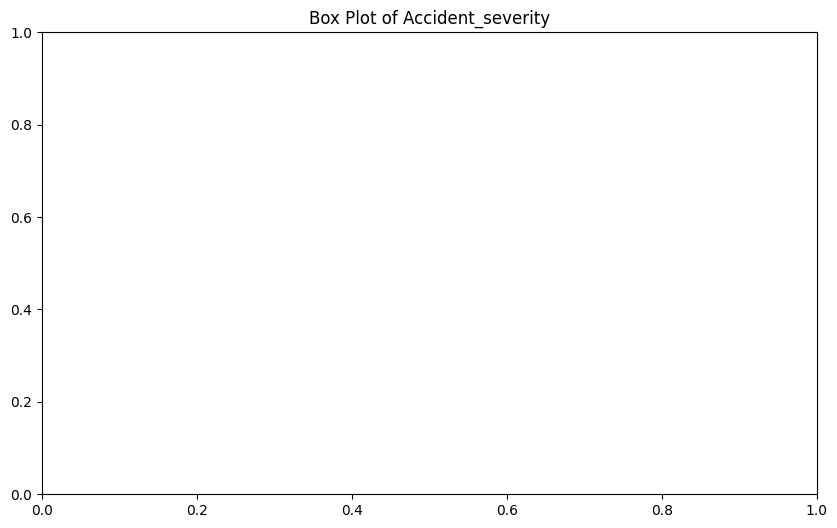

In [176]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Accident_severity', data=df)
plt.title('Box Plot of Accident_severity')
plt.show()

Scatter plot

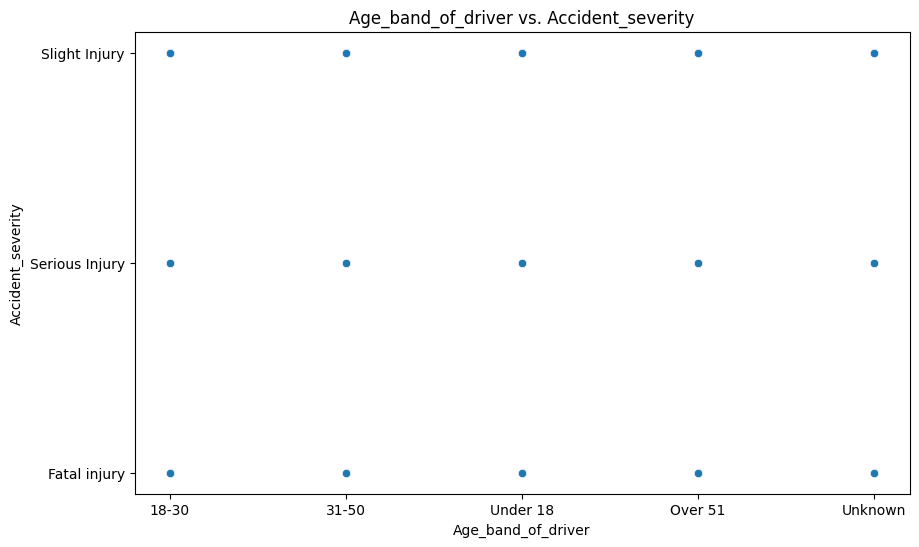

In [165]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age_band_of_driver', y='Accident_severity', data=df)
plt.title('Age_band_of_driver vs. Accident_severity')
plt.xlabel('Age_band_of_driver')
plt.ylabel('Accident_severity')
plt.show()

Line Plots

<ipython-input-181-36480c489041>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce')


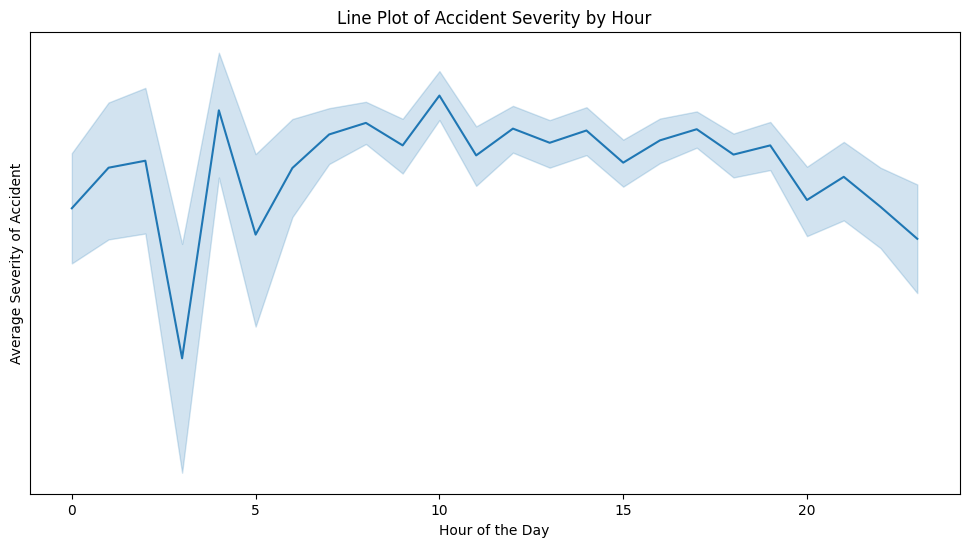

In [181]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# استخرج البيانات الزمنية
df['Hour'] = df['Time'].dt.hour

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Hour', y='Accident_severity', estimator='mean')
plt.title('Line Plot of Accident Severity by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Severity of Accident')
plt.show()


Histogram

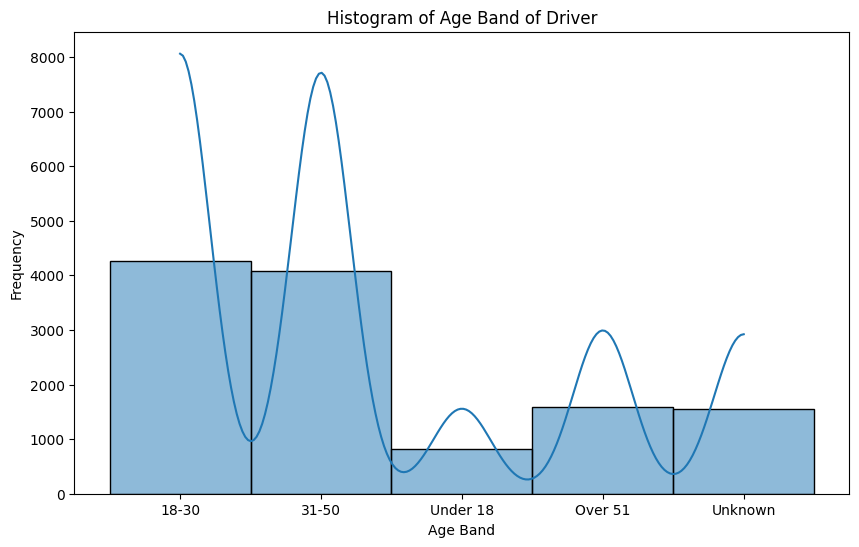

In [182]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age_band_of_driver'], bins=10, kde=True)
plt.title('Histogram of Age Band of Driver')
plt.xlabel('Age Band')
plt.ylabel('Frequency')
plt.show()


Heatmap of correlation matrix

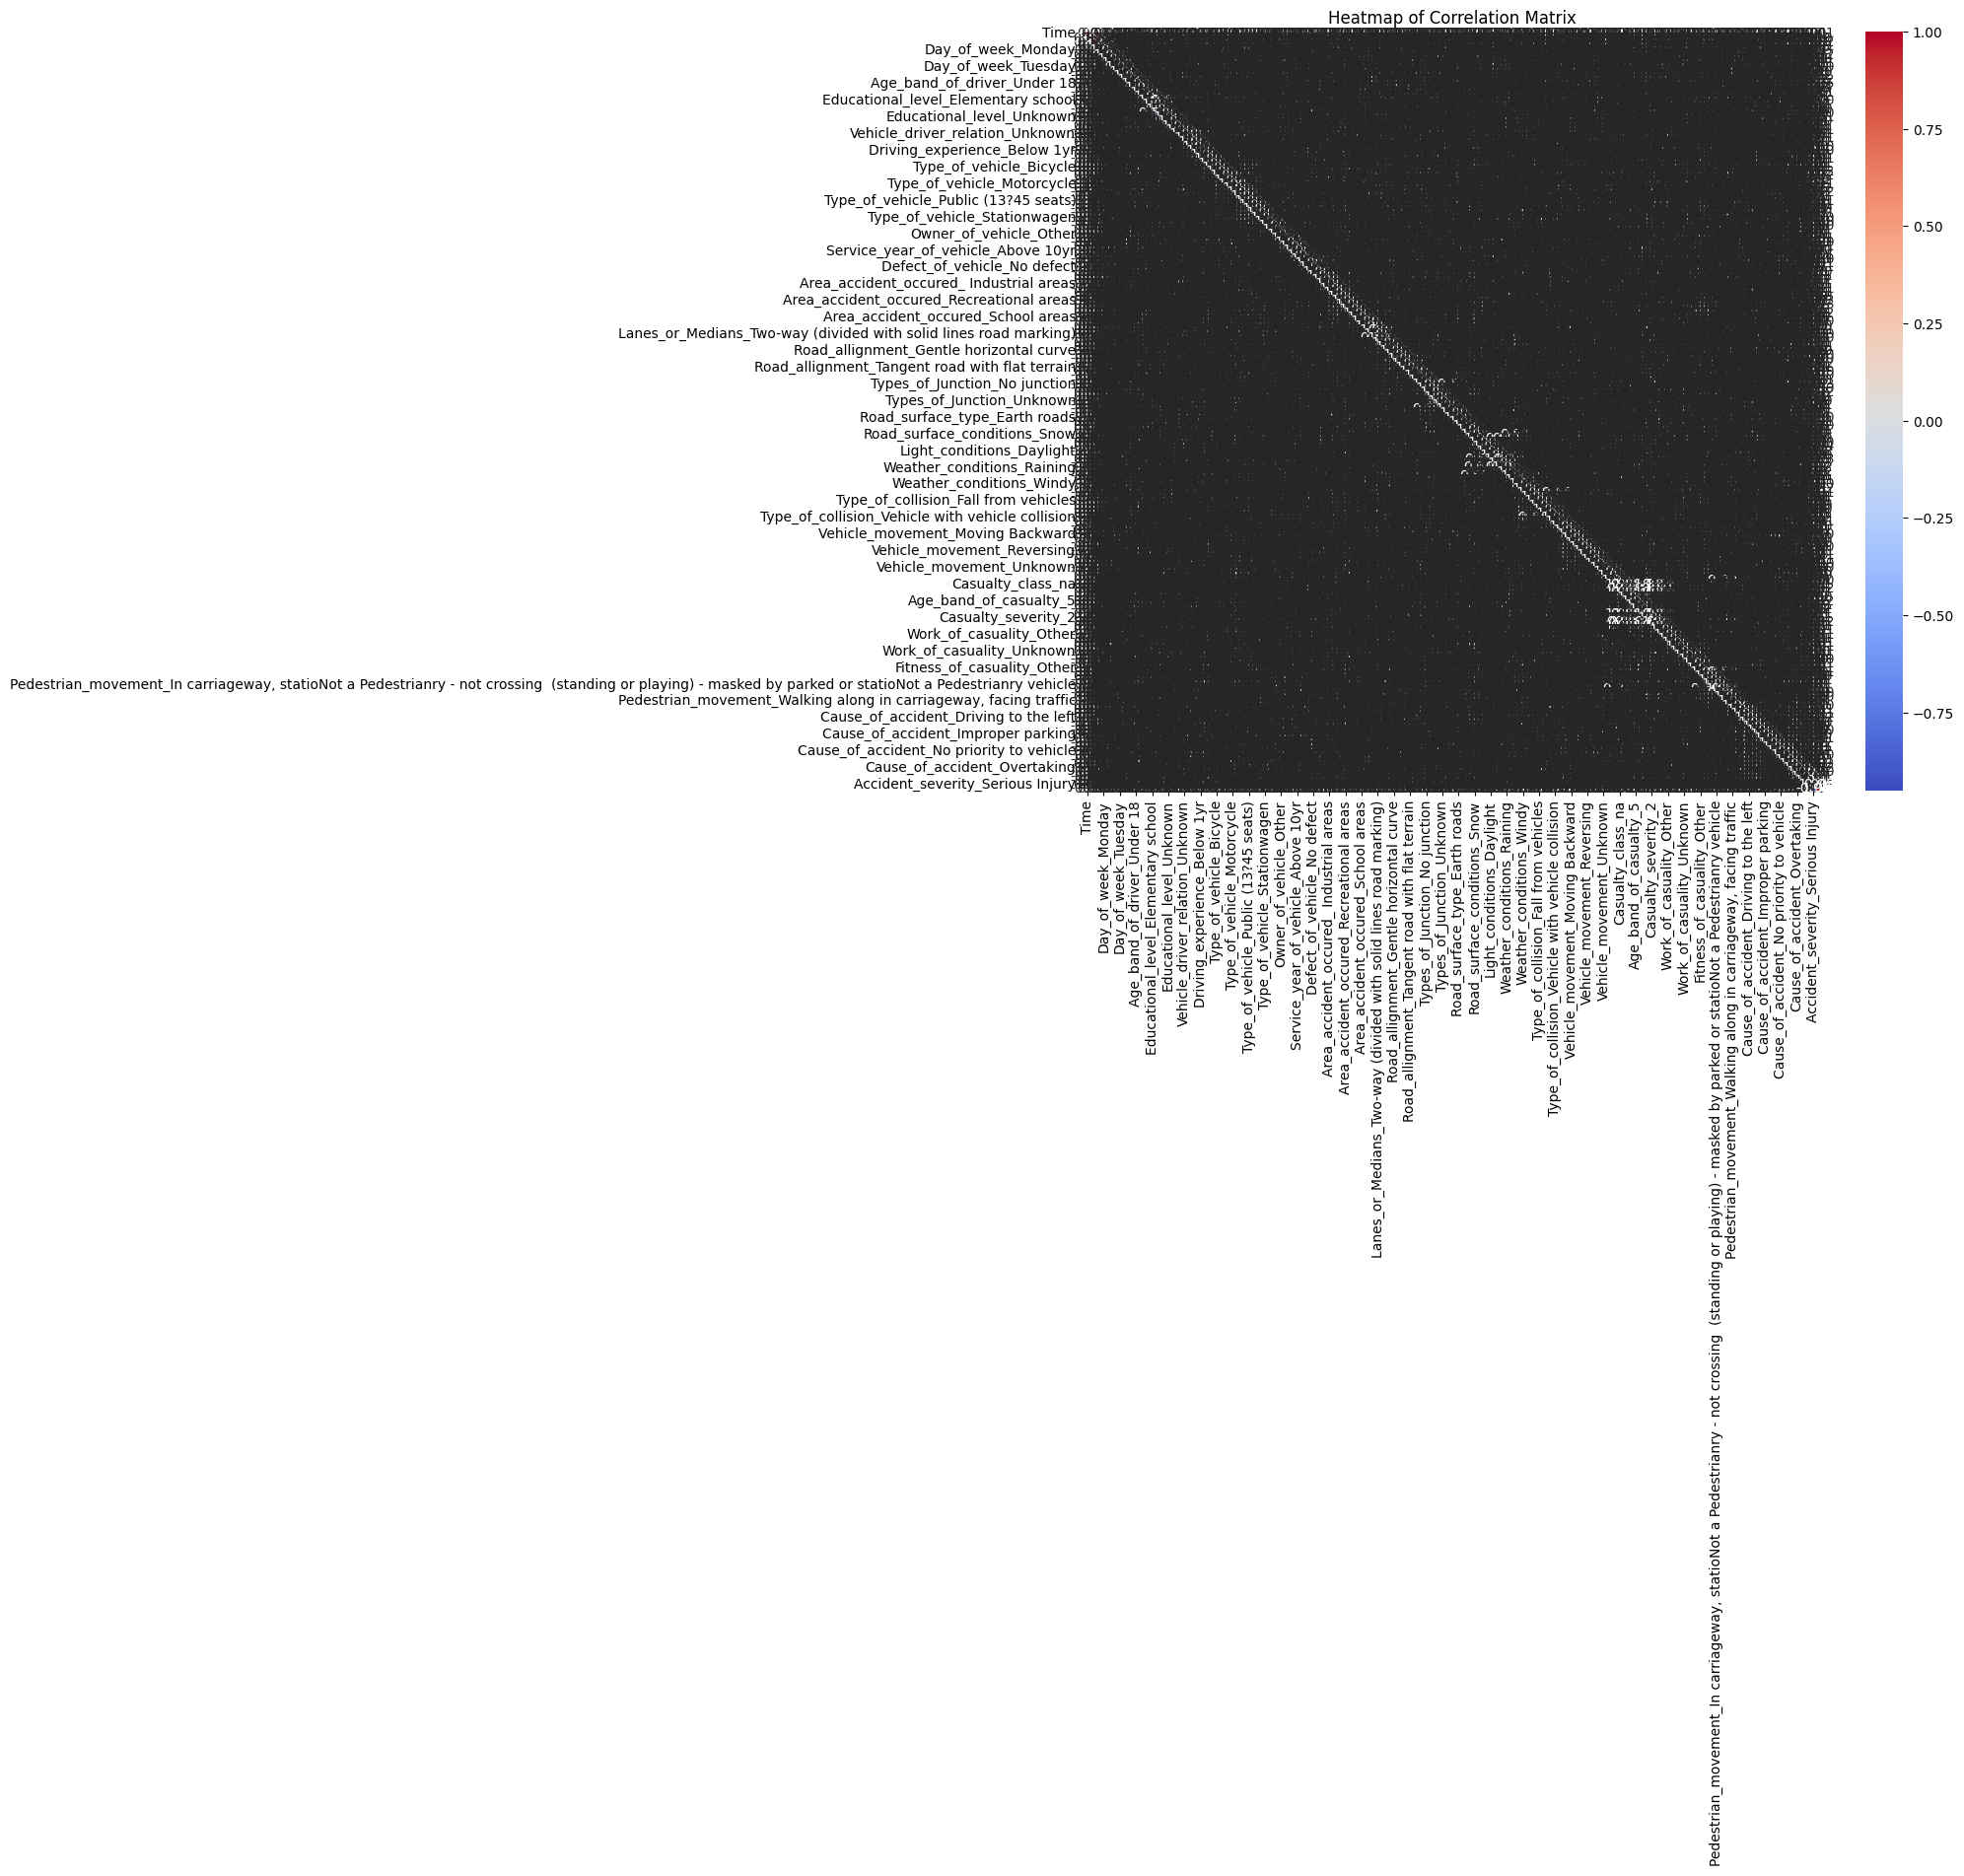

In [185]:

df_encoded = pd.get_dummies(df, drop_first=True)

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()


## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [212]:
import sklearn
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

# إعداد حجم خطوط المحاور والنصوص في الرسوم البيانية
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


#لضمان إمكانية تكرار وتحليل النتائج بشكل موثوق.
np.random.seed(42)


In [218]:
le = LabelEncoder()
df['Accident_severity'] = le.fit_transform(df['Accident_severity'])

In [219]:
X = df[['Age_band_of_driver', 'Accident_severity']]
y = df['Accident_severity']

In [220]:
X = pd.get_dummies(X, drop_first=True)


Scaleer عشان دقة المودل

In [221]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [230]:
X_new = np.array([[0], [2]])


In [231]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [232]:
model = LinearRegression()

model.fit(X_train, y_train)

# التنبؤ باستخدام مجموعة الاختبار
y_pred = model.predict(X_test)

In [233]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 5.650048152486714e-30


In [ ]:
X_new = np.array([[0, 2]])
X_new_scaled = scaler.transform(X_new)
y_new_pred = model.predict(X_new_scaled)

print('Predicted values for X_new:', y_new_pred)

#### Decision Tree Classifier

#### Support Vector Machine (SVM)

#### K-Neighbors Classifier

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: